In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('packet_loss_with_LOS.csv')

In [ ]:
np.random.seed(42)
data['Packet Loss Rate'] = data['Packet Loss Rate'] + np.random.normal(0, 0.0005, size=len(data))

# Select relevant features
features = ["LTE/5G", "Packet Loss Rate", "Packet delay", "GBR", "Healthcare",
            "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
X = data[features].values
y = np.where(data['Packet Loss Rate'] <= 0.001, 1, 0)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN-LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=True),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
data.describe()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type,LOS
count,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000
mean,10.974923,11.476459,0.003080,114.126745,0.468100,0.531900,0.441187,0.558813,0.106291,0.057943,0.116107,0.057879,0.059716,0.117722,0.058734,0.425609,1.702150,0.824399
std,6.053641,6.915643,0.004374,106.320976,0.498989,0.498989,0.496537,0.496537,0.308215,0.233639,0.320358,0.233519,0.236963,0.322283,0.235130,0.494443,0.822956,0.380486
min,1.000000,0.000000,-0.001960,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,6.000000,0.000049,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,11.000000,11.000000,0.000745,75.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,16.000000,17.000000,0.009385,150.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
max,22.000000,23.000000,0.012240,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


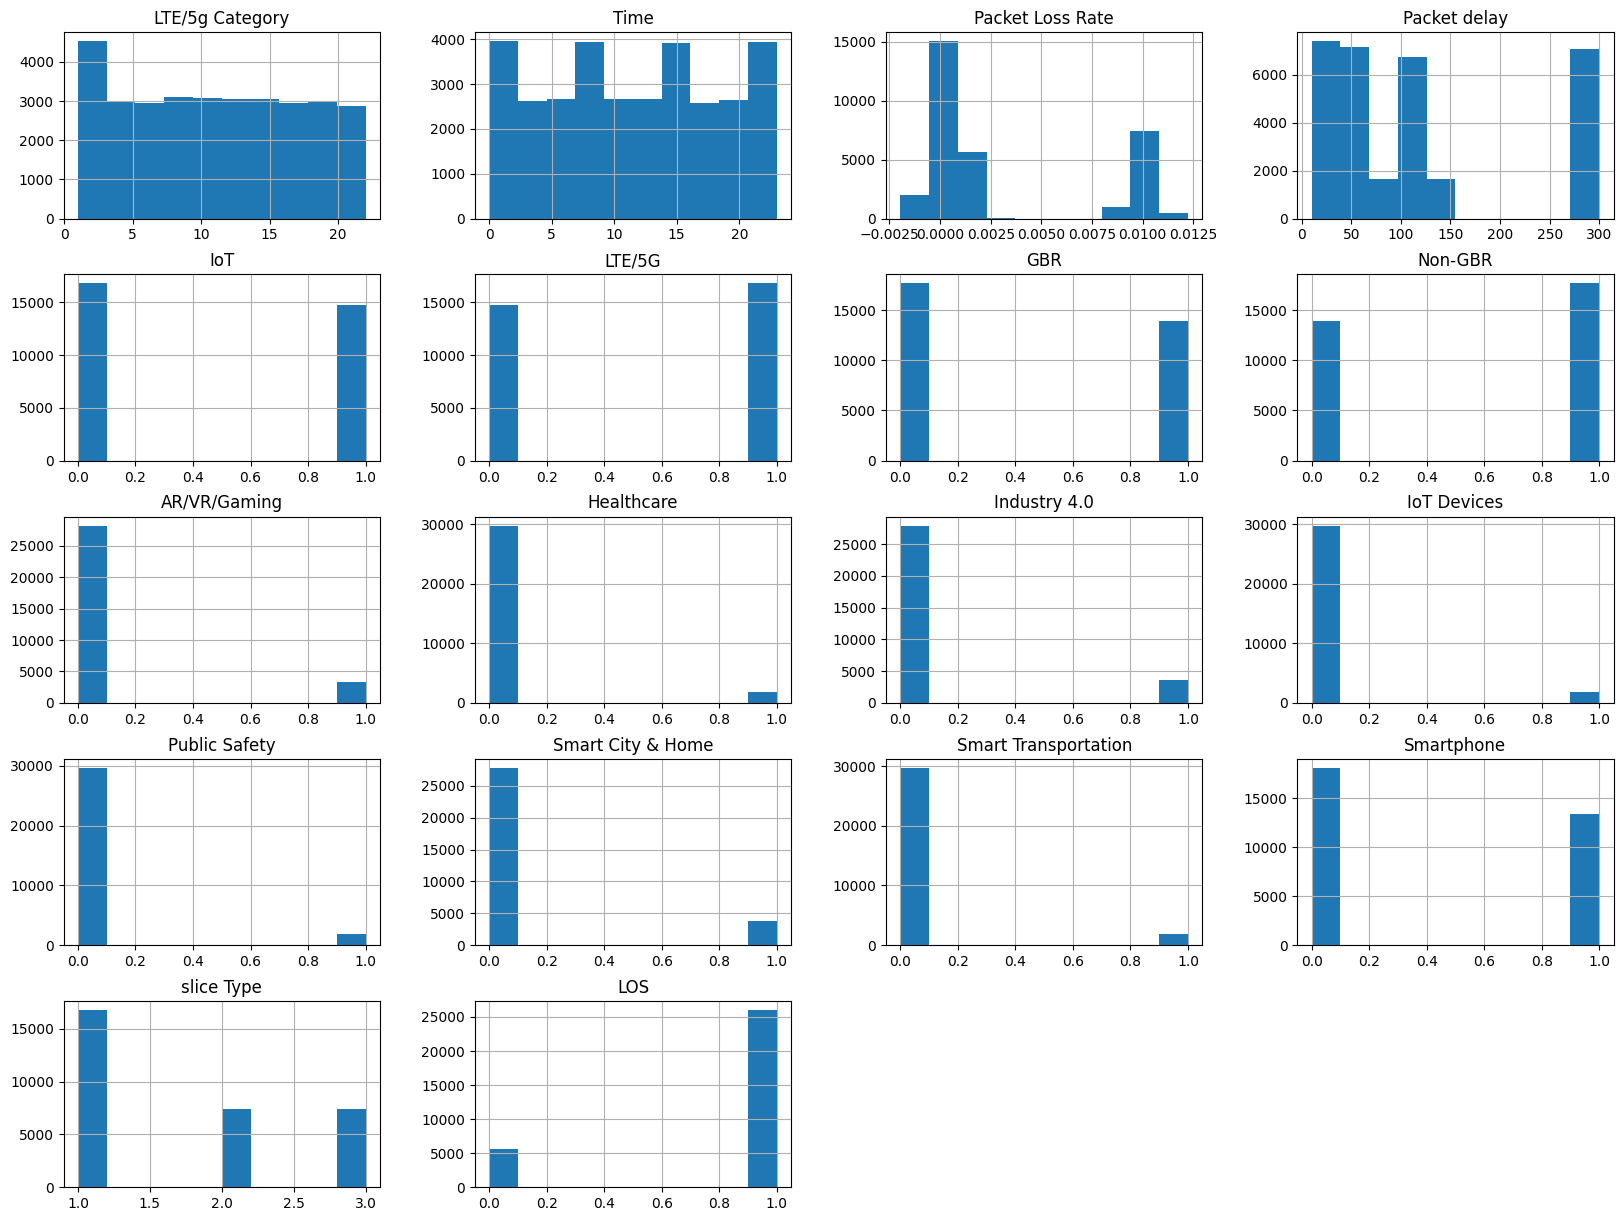

In [ ]:
data.hist(bins=10, figsize=(20,15))
plt.show()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8871 - loss: 0.2580 - val_accuracy: 0.9819 - val_loss: 0.0606
Epoch 2/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9659 - loss: 0.0853 - val_accuracy: 0.9824 - val_loss: 0.0491
Epoch 3/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9783 - loss: 0.0505 - val_accuracy: 0.9656 - val_loss: 0.0722
Epoch 4/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9829 - loss: 0.0407 - val_accuracy: 0.9916 - val_loss: 0.0199
Epoch 5/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9822 - loss: 0.0403 - val_accuracy: 0.9873 - val_loss: 0.0323
Epoch 6/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9853 - loss: 0.0371 - val_accuracy: 0.9842 - val_loss: 0.0304
Epoch 7/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9859 - loss: 0.0336 - val_accuracy: 0.9919 - val_loss: 0.0175
Epoch 8/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9858 - loss: 0.0329 - val_acc

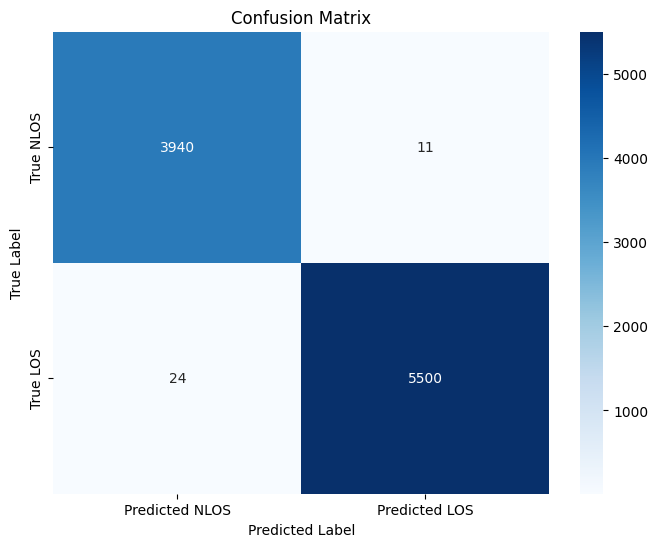

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"RMSE: {rmse:.4f}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted NLOS', 'Predicted LOS'],
            yticklabels=['True NLOS', 'True LOS'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
model.optimizer.learning_rate = 0.0001
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9978 - loss: 0.0086 - val_accuracy: 0.9953 - val_loss: 0.0102
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9978 - loss: 0.0079 - val_accuracy: 0.9975 - val_loss: 0.0073
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9976 - loss: 0.0068 - val_accuracy: 0.9948 - val_loss: 0.0089
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9981 - loss: 0.0065 - val_accuracy: 0.9966 - val_loss: 0.0070
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9977 - loss: 0.0061 - val_accuracy: 0.9982 - val_loss: 0.0053
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9976 - loss: 0.0064 - val_accuracy: 0.9980 - val_loss: 0.0050
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9978 - loss: 0.0058 - val_accuracy: 0.9989 - val_loss: 0.0046
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9985 - loss: 0.0044 - val_accuracy:

test dataset to predicting


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model = load_model('trained_model.h5')
test_data = pd.read_csv('test_packet_loss_with_LOS.csv')
features = ["LTE/5G", "Packet Loss Rate", "Packet delay", "GBR", "Healthcare",
            "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home",
            "Smart Transportation", "Smartphone"]
X_test = test_data[features].values
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
test_data['LOS Prediction'] = y_pred

In [ ]:
test_data.to_excel('updated_test_dataset_with_LOS.xlsx', index=False)
print("Updated test dataset with LOS predictions saved to 'updated_test_dataset_with_LOS.xlsx'.")

In [ ]:
y_true = test_data['LOS'].values
accuracy = accuracy_score(y_true, y_pred)
loss = mean_squared_error(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error (Loss): {loss:.4f}")
test_data.to_csv('test_predictions.csv', index=False)
print("Test dataset predictions saved to 'test_predictions.csv'.")


987/987 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
Updated test dataset with LOS predictions saved to 'updated_test_dataset_with_LOS.xlsx'.
Accuracy: 0.8382
Mean Squared Error (Loss): 0.1618
Test dataset predictions saved to 'test_predictions.csv'.


validation dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

In [ ]:
data = pd.read_csv('packet_loss_with_LOS.csv')
np.random.seed(42)
data['Packet Loss Rate'] += np.random.normal(0, 0.0005, size=len(data))
features = ["LTE/5G", "Packet Loss Rate", "Packet delay", "GBR", "Healthcare",
            "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
X = data[features].values
y = np.where(data['Packet Loss Rate'] <= 0.001, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=True),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])
model.save('trained_model.h5')
print("Model saved as 'trained_model.h5'.")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8816 - loss: 0.2651 - val_accuracy: 0.9882 - val_loss: 0.0361
Epoch 2/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9799 - loss: 0.0487 - val_accuracy: 0.9950 - val_loss: 0.0190
Epoch 3/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9840 - loss: 0.0389 - val_accuracy: 0.9928 - val_loss: 0.0176
Epoch 4/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9882 - loss: 0.0292 - val_accuracy: 0.9950 - val_loss: 0.0184
Epoch 5/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9881 - loss: 0.0287 - val_accuracy: 0.9966 - val_loss: 0.0138
Epoch 6/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0238 - val_accuracy: 0.9747 - val_loss: 0.0608
Epoch 7/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9869 - loss: 0.0310 - val_accuracy: 0.9851 - val_loss: 0.0348
Epoch 8/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9883 - loss: 0.0265 - val_accuracy: 0.988

Model saved as 'trained_model.h5'.
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9956


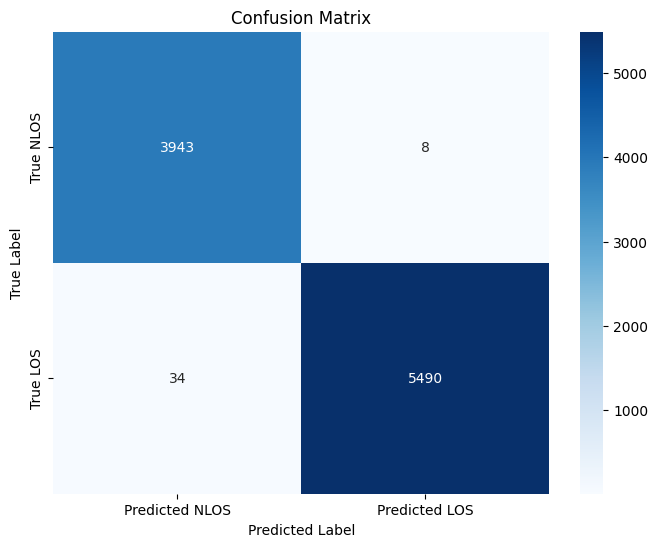

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Updated dataset with LOS predictions saved to 'updated_dataset_with_LOS.xlsx'.


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted NLOS', 'Predicted LOS'],
            yticklabels=['True NLOS', 'True LOS'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
model = load_model('trained_model.h5')
data_to_predict = pd.read_csv('validation_withoutlos.csv')
features = ["LTE/5G", "Packet Loss Rate", "Packet delay", "GBR", "Healthcare",
            "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home",
            "Smart Transportation", "Smartphone"]
X_to_predict = data_to_predict[features].values
scaler = StandardScaler()
X_to_predict = scaler.fit_transform(X_to_predict)
X_to_predict = X_to_predict.reshape((X_to_predict.shape[0], X_to_predict.shape[1], 1))
y_pred_prob = model.predict(X_to_predict)
y_pred = (y_pred_prob > 0.5).astype(int)
data_to_predict['LOS Prediction'] = y_pred
data_to_predict.to_excel('updated_dataset_with_LOS.xlsx', index=False)
print("Updated dataset with LOS predictions saved to 'updated_dataset_with_LOS.xlsx'.")

RANDOM SAMPLING

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
num_samples = 1000

def generate_realistic_data(num_samples):
    lte_5g = np.random.normal(0.7, 0.15, num_samples)
    base_packet_loss = 0.05 - 0.03 * lte_5g + np.random.normal(0, 0.01, num_samples)
    packet_loss = np.clip(base_packet_loss, 0, 1)
    packet_delay = 0.3 - 0.2 * lte_5g + 0.5 * packet_loss + np.random.normal(0, 0.05, num_samples)
    packet_delay = np.clip(packet_delay, 0, 1)
    gbr = 0.6 * lte_5g + np.random.normal(0, 0.1, num_samples)
    gbr = np.clip(gbr, 0, 1)
    data = {
        "LTE/5G": lte_5g,
        "Packet Loss Rate": packet_loss,
        "Packet delay": packet_delay,
        "GBR": gbr,
        "Healthcare": np.random.binomial(1, 0.15, num_samples),
        "Industry 4.0": np.random.binomial(1, 0.25, num_samples),
        "IoT Devices": np.random.binomial(1, 0.4, num_samples),
        "Public Safety": np.random.binomial(1, 0.1, num_samples),
        "Smart City & Home": np.random.binomial(1, 0.3, num_samples),
        "Smart Transportation": np.random.binomial(1, 0.2, num_samples),
        "Smartphone": np.random.binomial(1, 0.7, num_samples),
    }
    return pd.DataFrame(data)
df = generate_realistic_data(num_samples)
csv_file_path = 'packet_loss_with_LOS_rg.csv'
df.to_csv(csv_file_path, index=False)

data = pd.read_csv(csv_file_path)

features = [col for col in data.columns if col != 'Packet Loss Rate']

X = data[features].values
y = np.where(data['Packet Loss Rate'] <= 0.03, 1, 0)

X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_rg = scaler.fit_transform(X_train_rg)
X_test_rg = scaler.transform(X_test_rg)

X_train_rg = X_train_rg.reshape((X_train_rg.shape[0], X_train_rg.shape[1], 1))
X_test_rg = X_test_rg.reshape((X_test_rg.shape[0], X_test_rg.shape[1], 1))

model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_rg.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, return_sequences=True, recurrent_dropout=0.2),
    LSTM(16, recurrent_dropout=0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    min_delta=0.001
)

history = model.fit(
    X_train_rg,
    y_train_rg,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

y_pred_rg = (model.predict(X_test_rg) > 0.5).astype(int)
accuracy = accuracy_score(y_test_rg, y_pred_rg)
conf_matrix = confusion_matrix(y_test_rg, y_pred_rg)

print("\nModel Performance:")
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.4906 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4938 - loss: 0.6925 - val_accuracy: 0.5571 - val_loss: 0.6919
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5537 - loss: 0.6899 - val_accuracy: 0.5357 - val_loss: 0.6905
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5531 - loss: 0.6877 - val_accuracy: 0.5714 - val_loss: 0.6877
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5443 - loss: 0.6834 - val_accuracy: 0.5929 - val_loss: 0.6757
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5804 - loss: 0.6804 - val_accuracy: 0.6071 - val_loss: 0.6546
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6009 - loss: 0.6623 - val_accuracy: 0.6429 - val_loss: 0.6350
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6373 - loss: 0.6532 - val_accuracy: 0.6214 - 

297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


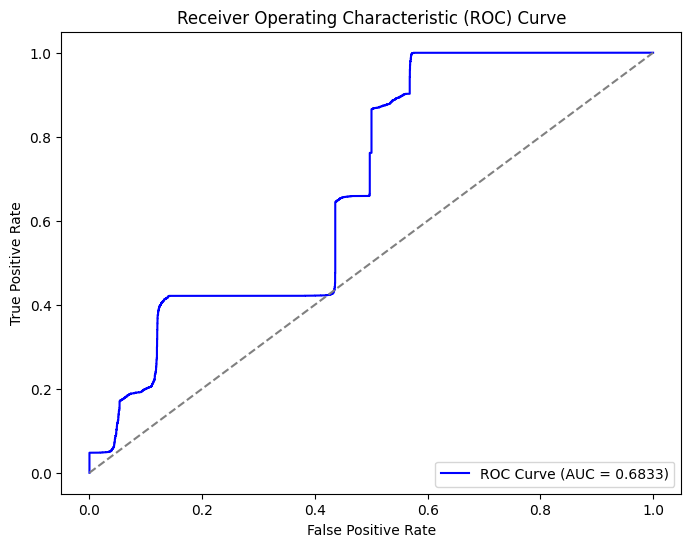

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
